In [ ]:
"""
@Author      :   Tairan Ren, Xingyi Liu
@Time        :   2022/11/16 14:07:13
@Class       :   Fall2022 CS5001
@Description :   for the demo, this will only call the functions from previous, 
                 and will only form graphs.
"""

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dim_to_ads as tdm

In [3]:
def read_csv(filename):
    return pd.read_csv(filename)

In [4]:
# the bar graph generator 
def graph_bar(filename,columns,barh = None, plot = None, sort = False):
    '''
    filename : filename
    columns : key
    barh : whether horizantal or not
    plot : line graph or not
    sort : sort by second column or not
    '''
    df = read_csv(f'data/ads/{filename}')
    if sort :
        header = list(df)
        #df = df.sort_values(by='id',ascending=True)
        df = df.sort_values(by=header[1],ascending=True)
    df_table = df.pivot_table(columns=columns)
    y_data = df[f'{columns}_'] = df.iloc[:,-1]
    x_data = df[columns]
    if barh == True:
        plt.barh(x_data,y_data,0.5,color = ['paleturquoise','mediumturquoise','lightseagreen','turquoise','aquamarine'])
    elif barh == False:
        plt.bar(x_data,y_data,0.5,color = ['darkslategray','teal','cadetblue','steelblue','darkcyan'])
    elif plot == True:
        plt.plot(x_data,y_data,0.5,marker='o',mfc='orange',ms=5,mec='c',lw=1.0,ls="-",c='green' )
        
    plt.xticks(rotation=270)
    plt.tight_layout()
    plt.show()
    return df_table

In [5]:
# the multi line graph generator
def multi_line(filenames:list,columns = None):
    
    color = ['darkgray','rosybrown','darkgoldenrod','darkslategray','midnightblue'] 
    for i in range(len(filenames)):
        columns = 'type_month'
        df = read_csv(f'data/ads/{filenames[i]}')
        y_data = df[f'{columns}_'] = df.iloc[:,-1]
        df[columns] = tdm.MONTH
        x_data = df[columns]
        flag = i
        if flag > len(color):
            flag -= len(color)
        plt.plot(x_data,y_data,label= columns,marker='o',mfc='orange',ms=5,mec='c',lw=1.0,ls="-",c= color[flag],  )

    plt.xticks(rotation=270)
    plt.tight_layout()
    plt.show()

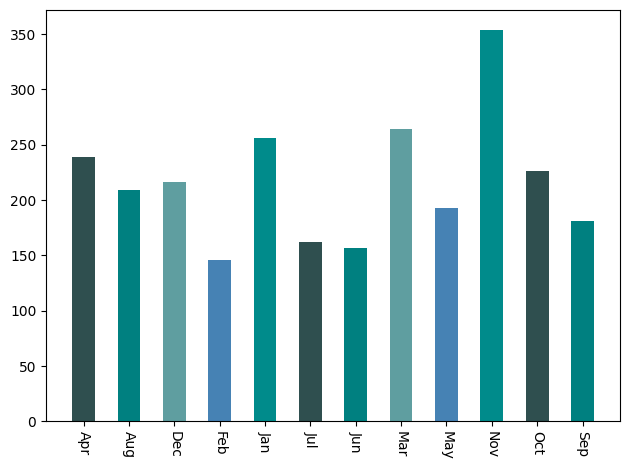

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
id,239,209,216,146,256,162,157,264,193,354,226,181


In [6]:
# The month bar graph from two websites
graph_bar('ads_month_grouped_rotten.csv','month',barh=False)

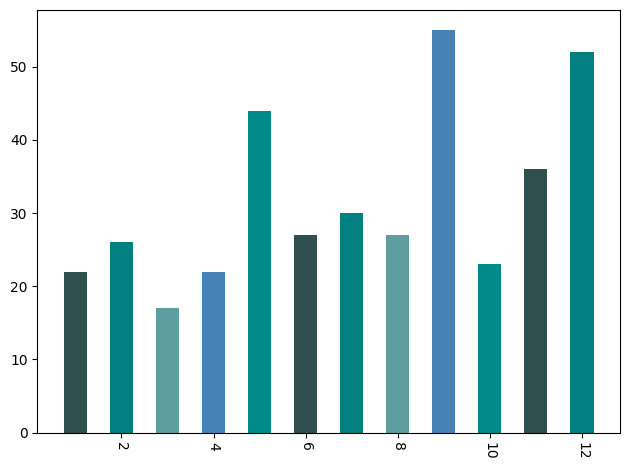

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
id,22,26,17,22,44,27,30,27,55,23,36,52


In [7]:
# for the chinese website
graph_bar('ads_month_grouped_douban.csv','month',barh=False)

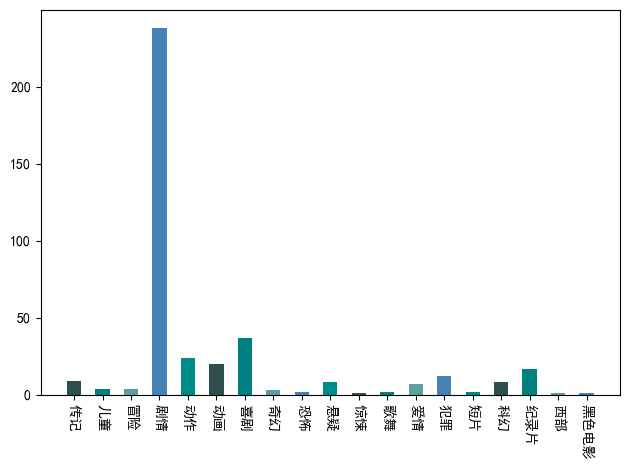

primary_type,传记,儿童,冒险,剧情,动作,动画,喜剧,奇幻,恐怖,悬疑,惊悚,歌舞,爱情,犯罪,短片,科幻,纪录片,西部,黑色电影
id,9,4,4,238,24,20,37,3,2,8,1,2,7,12,2,8,17,1,1


In [8]:
# for the matplot to show Chinese has to set the fonts, this is the types for douban 
# totally biased, but also totally expected, the website is famous for in favor of this type
mpl.rcParams['font.family'] = 'SimHei'
graph_bar('ads_primary_type_grouped_douban.csv','primary_type',barh=False)

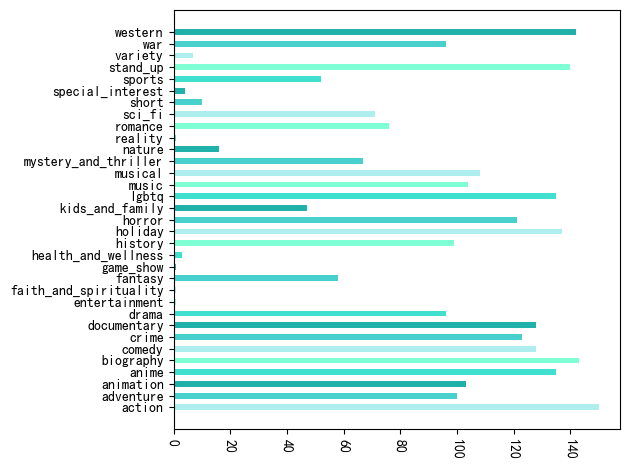

type,action,adventure,animation,anime,biography,comedy,crime,documentary,drama,entertainment,...,reality,romance,sci_fi,short,special_interest,sports,stand_up,variety,war,western
id,150,100,103,135,143,128,123,128,96,1,...,1,76,71,10,4,52,140,7,96,142


In [9]:
# the types for rotten tomato, with barh to True it could generate horizontal graphs
graph_bar('ads_type_grouped_rotten.csv','type',barh=True)

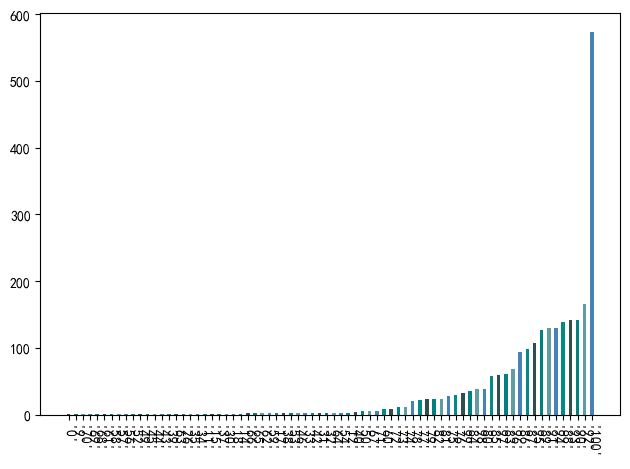

audience_score,'0','100','11','12','14','15','17','18','26','30',...,'90','91','92','93','94','95','96','97','98','99'
id,1,573,1,3,1,1,2,1,1,1,...,141,129,166,141,130,107,68,59,38,33


In [10]:
# the score with rotten
graph_bar('ads_audience_score_grouped_rotten.csv','audience_score',barh=False,sort=True)

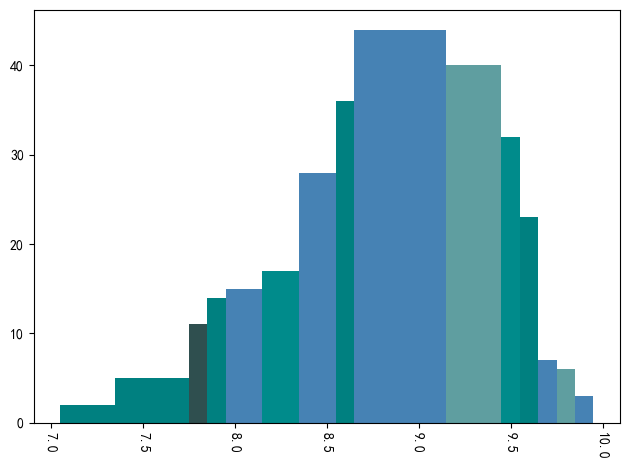

score,7.3,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,...,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7
id,2,1,5,3,4,4,11,14,15,14,...,36,44,22,35,40,32,23,7,6,3


In [11]:
# kind of obvious that user of rotten tomato loves 100 marks， apprantley user of douban is harsher
graph_bar('ads_score_grouped_douban.csv','score',barh=False,sort=True)

   month_type  counts
0  Apr_action      14


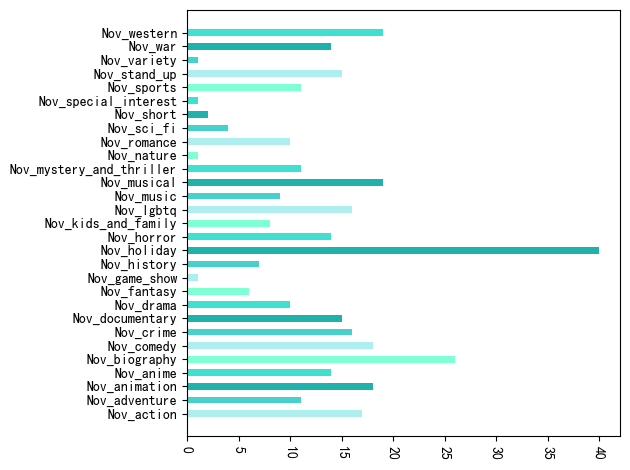

month_type,Nov_action,Nov_adventure,Nov_animation,Nov_anime,Nov_biography,Nov_comedy,Nov_crime,Nov_documentary,Nov_drama,Nov_fantasy,...,Nov_nature,Nov_romance,Nov_sci_fi,Nov_short,Nov_special_interest,Nov_sports,Nov_stand_up,Nov_variety,Nov_war,Nov_western
counts,17,11,18,14,26,18,16,15,10,6,...,1,10,4,2,1,11,15,1,14,19


In [12]:
# the month with highest number of movies, since we know that nov is with the largest number
tdm.dimension_concact_ads('month','type','rotten','Nov')
# from the rules we can know the output name would be :
graph_bar('ads_month_type_Nov_counts_rotten.csv','month_type',barh=True)

   month_type  counts
0  Apr_action      14


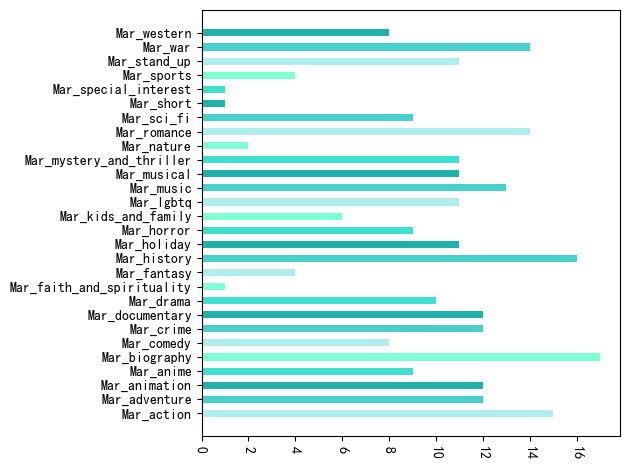

month_type,Mar_action,Mar_adventure,Mar_animation,Mar_anime,Mar_biography,Mar_comedy,Mar_crime,Mar_documentary,Mar_drama,Mar_faith_and_spirituality,...,Mar_mystery_and_thriller,Mar_nature,Mar_romance,Mar_sci_fi,Mar_short,Mar_special_interest,Mar_sports,Mar_stand_up,Mar_war,Mar_western
counts,15,12,12,9,17,8,12,12,10,1,...,11,2,14,9,1,1,4,11,14,8


In [13]:
# and can enter any month
tdm.dimension_concact_ads('month','type','rotten','Mar')
graph_bar('ads_month_type_Mar_counts_rotten.csv','month_type',barh=True)

   type_month  counts
0  action_Apr      14


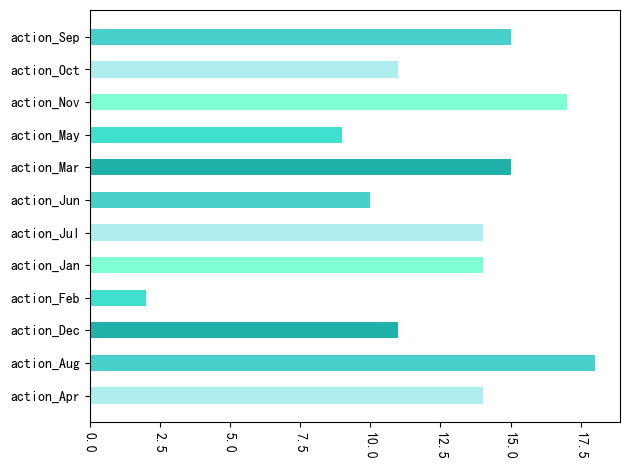

type_month,action_Apr,action_Aug,action_Dec,action_Feb,action_Jan,action_Jul,action_Jun,action_Mar,action_May,action_Nov,action_Oct,action_Sep
counts,14,18,11,2,14,14,10,15,9,17,11,15


In [14]:
# it could generate any two columns, and show the desired data
# it will caoncact the name and form new file 
tdm.dimension_concact_ads('type','month','rotten','action')
graph_bar('ads_type_month_action_counts_rotten.csv','type_month',barh=True)

   type_month  counts
0  action_Jan      14


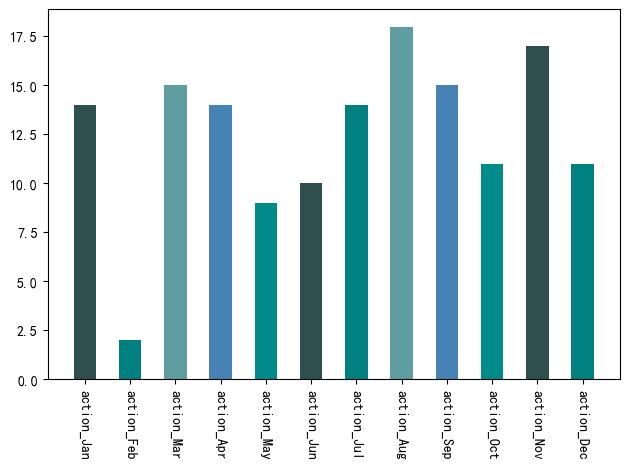

type_month,action_Apr,action_Aug,action_Dec,action_Feb,action_Jan,action_Jul,action_Jun,action_Mar,action_May,action_Nov,action_Oct,action_Sep
counts,14,18,11,2,14,14,10,15,9,17,11,15


In [15]:
# sorted version
tdm.sort_ads_type_month('data/ads/ads_type_month_action_counts_rotten.csv','action')
graph_bar('ads_type_month_action_counts_rotten.csv','type_month',barh=False)

   type_month  counts
0  action_Apr      14
   type_month  counts
0  sports_Jan       1


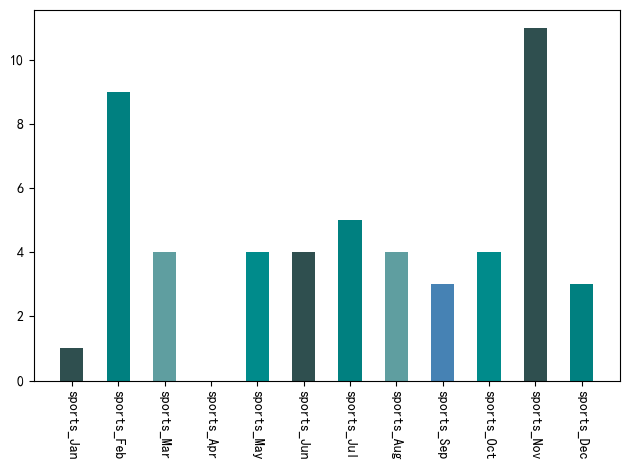

type_month,sports_Apr,sports_Aug,sports_Dec,sports_Feb,sports_Jan,sports_Jul,sports_Jun,sports_Mar,sports_May,sports_Nov,sports_Oct,sports_Sep
counts,0,4,3,9,1,5,4,4,4,11,4,3


In [16]:
# and of course any type
tdm.dimension_concact_ads('type','month','rotten','sports')
tdm.sort_ads_type_month('data/ads/ads_type_month_sports_counts_rotten.csv','sports')
# after sorting , the column names would be the same as the main key, this is only useful when month is joined
graph_bar('ads_type_month_sports_counts_rotten.csv','type_month',barh=False)

  type_audience_score  counts
0        action_'100'      28


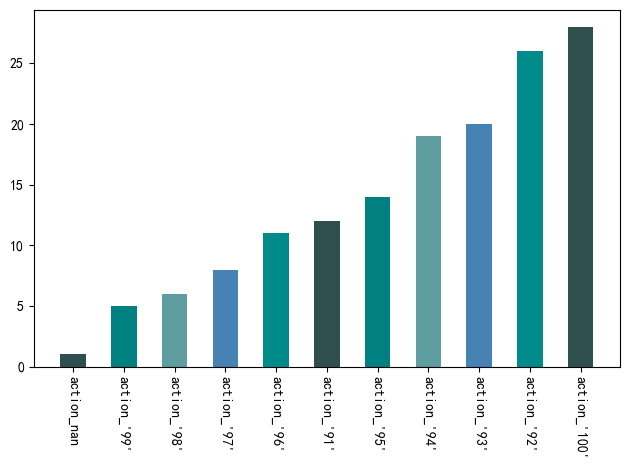

type_audience_score,action_'100',action_'91',action_'92',action_'93',action_'94',action_'95',action_'96',action_'97',action_'98',action_'99',action_nan
counts,28,12,26,20,19,14,11,8,6,5,1


In [17]:
# and the score type, the possibility of doing three dimension is possible, but if such need exists
# would be better if just set up databases, that would simplify everything a lot
tdm.dimension_concact_ads('type','audience_score','rotten','action')
graph_bar('ads_type_audience_score_action_counts_rotten.csv','type_audience_score',barh=False,sort=True)

  month_audience_score  counts
0            Apr_'100'      67


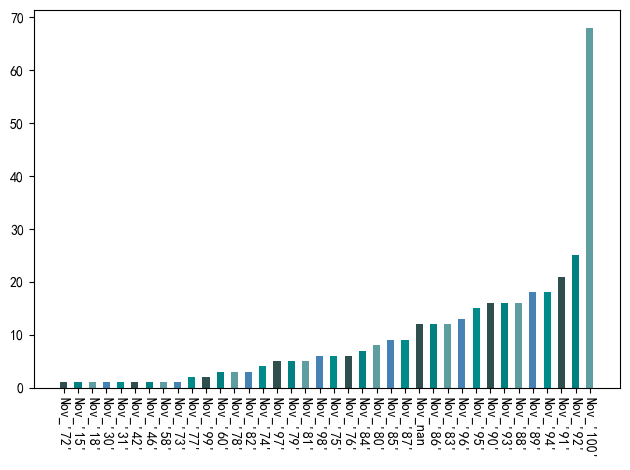

month_audience_score,Nov_'100',Nov_'15',Nov_'18',Nov_'30',Nov_'31',Nov_'42',Nov_'46',Nov_'58',Nov_'60',Nov_'72',...,Nov_'91',Nov_'92',Nov_'93',Nov_'94',Nov_'95',Nov_'96',Nov_'97',Nov_'98',Nov_'99',Nov_nan
counts,68,1,1,1,1,1,1,1,3,1,...,21,25,16,18,15,13,5,6,2,12


In [18]:
# and month scores:
tdm.dimension_concact_ads('month','audience_score','rotten','Nov')
graph_bar('ads_month_audience_score_Nov_counts_rotten.csv','month_audience_score',barh=False,sort=True)

   type_month  counts
0  action_Jan      14


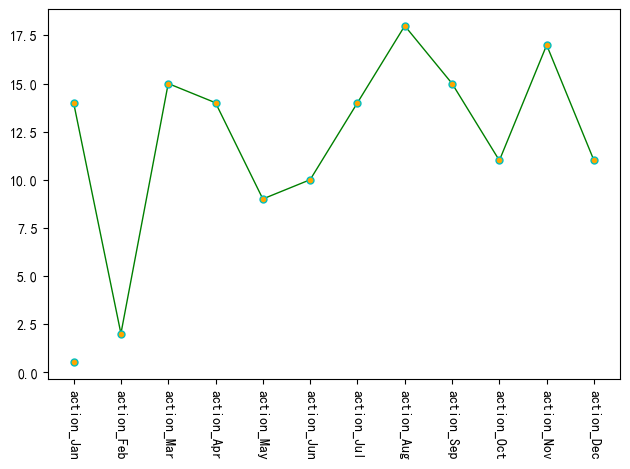

type_month,action_Apr,action_Aug,action_Dec,action_Feb,action_Jan,action_Jul,action_Jun,action_Mar,action_May,action_Nov,action_Oct,action_Sep
counts,14,18,11,2,14,14,10,15,9,17,11,15


In [19]:
# and ofcourse the function could generate line graphs
tdm.sort_ads_type_month('data/ads/ads_type_month_action_counts_rotten.csv','action')
graph_bar('ads_type_month_action_counts_rotten.csv','type_month',plot=True)

   type_month  counts
0  action_Apr      14
   type_month  counts
0  sports_Jan       1


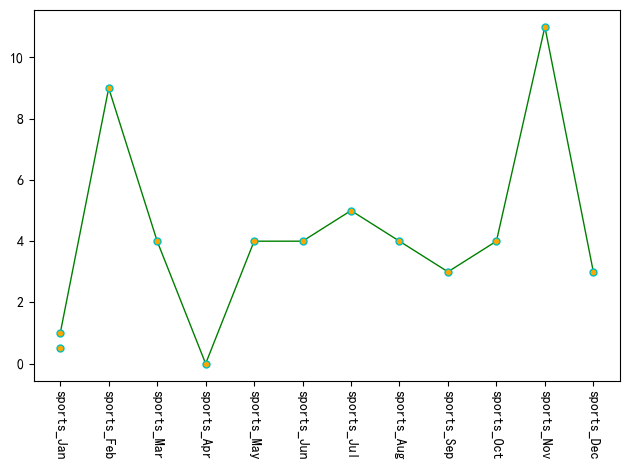

type_month,sports_Apr,sports_Aug,sports_Dec,sports_Feb,sports_Jan,sports_Jul,sports_Jun,sports_Mar,sports_May,sports_Nov,sports_Oct,sports_Sep
counts,0,4,3,9,1,5,4,4,4,11,4,3


In [20]:
# lets look at another type: sports:
tdm.dimension_concact_ads('type','month','rotten','sports')
tdm.sort_ads_type_month('data/ads/ads_type_month_sports_counts_rotten.csv','sports')
graph_bar('ads_type_month_sports_counts_rotten.csv','type_month',plot=True)

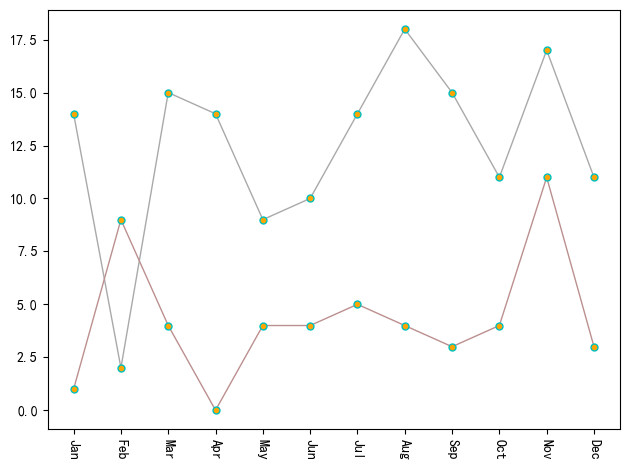

In [21]:
# and adding the two kinds together:
multi_line(['ads_type_month_action_counts_rotten.csv','ads_type_month_sports_counts_rotten.csv'])